##### Paul Mc Grath - Machine Learning & Stats- Winter 2022 Module- Assessment  
---

[link to my public repository on Github](https://github.com/doodymack/Machine_Learn_Stats-Assessment/tree/main/Time%20Series%20Anomaly%20Detection-Keras) email: polmaccraith@outlook.com

# Time Series Anomaly Detection

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/  

Link to Source Material [Time_Series_Anomaly_Detection](https://keras.io/examples/timeseries/timeseries_anomaly_detection/ "Time Series Anomaly Detection").  



### Introduction:
---

#### Aim 

This Notebook will demonstrate the use of Keras (Tensorflow) Machine Learning in demonstration of its use for analysis ot time-series data and detection of real-time anomalies.


#### Machine Learning

Machine learning (ML) is the practice of helping software perform a task without explicit programming or rules.  
With traditional computer programming, a programmer specifies rules that the computer should use.  
ML requires a different mindset, though. real-world ML focuses far more on data analysis than coding  
Programmers/Data analysts provide a set of examples and the computer learns patterns from the data.

#### Tensorflow  

[TensorFlow][3] is an end-to-end platform for machine learning. It supports the following:

- Multidimensional-array based numeric computation  
- GPU and distributed processing  
- Automatic differentiation  
- Model construction, training, and export

[3]: <https://www.tensorflow.org/about>

#### Keras  

[Keras][4] is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.  
Being able to go from idea to result as fast as possible is key to doing good research.

[4]: <https://keras.io/>

#### Detecting anomalies  

Much of the world's data is streaming, time-series data, where anomalies give significant information in critical situations.  
These exist in diverse areas such as IT, Mecical, Onling Gambling, Enerty and Security.  
Detecting anomalies in streaming data is a difficult task, requiring detectors to process data in real-time and learn while simultaneously making predictions.  
There are limited benchmarks to adequately test and score the efficacy of real-time anomaly detectors.  
[Anomaly detection][2] is a step in data mining that identifies data points, events, and/or observations that deviate from a dataset’s normal behavior  
Anomalous data can indicate critical incidents, such as a technical glitch, or potential opportunities, for instance a change in consumer behavior  
Machine learning is progressively being used to automate anomaly detection.  

### Understanding ID and 3D Convolution  
When we say Convolution Neural Network (CNN), generally we refer to a 2 dimensional CNN 'Conv2D' which is used for image classification.  
But there are two other types of Convolution Neural Networks used in the real world, which are 1 dimensional and 3-dimensional CNNs.  
Conv2D is generally used on image data. It is called 2 dimensional CNN because the kernel slides along 2 dimensions on the data.  
The whole advantage of using CNN is that it can extract the spatial features from the data using its kernel, which other networks are unable to do.  
For example, CNN can detect edges, distribution of colours etc in the image.  
This makes these networks very robust in image classification and other similar data which contain spatial properties.  

On the other hand In Conv1D, kernel slides along one dimension.  
Time-Series data has spatial properties thus is perfectly suited to use kernel sliding in only one dimension.  
The kernel can only move in one dimension along the x axis. In 1D CNN, kernel moves in 1 direction.  
Input and output data of 1D CNN is 2 dimensional.  Conv1D is mostly used on Time-Series data.

#### Time-series data
Successful anomaly detection hinges on an ability to accurately analyze time-series data in real-time.  
Time series data is composed of a sequence of values over time.  
That means each point is typically a pair of two items — a timestamp for when the metric was measured, and the value associated with that metric at that time.  
Time series anomaly detection must first create a baseline for normal behavior in primary KPIs.  
With that baseline understood, time series data anomaly detection systems can track seasonality — the cyclical patterns of behavior within key datasets.

[2]: <https://www.anodot.com/blog/what-is-anomaly-detection>

Link to Source Material [Time_Series_Anomaly_Detection](https://keras.io/examples/timeseries/timeseries_anomaly_detection/).

#### Numenta Anomaly Benchmark  

Numenta Anomaly Benchmark [NAB][1] provides a public repository of open-source tools that can be used to test and measure anomaly detection algorithms on time-series streaming data.  
NAB supplies benchmark datasets with labeled, real-world time-series data.  
NAB provides artifical timeseries data containing labeled anomalous periods of behavior. Data are ordered, timestamped, single-valued metrics.  
In this notebook I will present the use of Keras to attempt to detect a time-series anomaly from one NAB dataset, *art_daily_small_noise.csv* file  and the *art_daily_jumpsup.csv* file from the NAB repository.  
In doing so the notebook will demonstrate how Keras can be put to use to detect real-time anomalies in time-series data.


[1]: <https://github.com/numenta/NAB>

#### Loss Function in TensorFlow  

In machine learning you develop a model, which is a hypothesis, to predict a value given a set of input values.  
The model has a set of weights which you tune based on a set of training data.  
The training data has several pairs of input values as well as predicted values.  
We use a loss function to determine how far the predicted values deviate from the actual values in the training data.  
We change the model weights to make the loss minimum.  
This is the essence of training the model.  
Once Neural Network training is complete and satisfactory we can use the model to predict futore events.

#### Libraries  
First make sure we have downloaded the libraries/packages  that this notebook will require.  
Other requirements are listed in the requirements.txt file in the repository.

In [1]:
# import required libraries

# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Layers of Neural networks.
import tensorflow.keras as keras 

# Plotting
import matplotlib.pyplot as plt

<br>

## Data
---

#### Numenta Anomaly Benchmark (NAB)  


The [Numenta Anomaly Benchmark][7] (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications  
It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications  
All of the data and code is fully open-source, with extensive documentation, and a scoreboard of anomaly detection algorithms.  
The 58 timeseries data files in NAB database is designed to provide data for research in streaming anomaly detection.  

All the data is open source and available to download from the [github repository][8].

In this exercise we will use artificial timeseries data that has two corresponding time series plots 'measured' over a 2 week period that has companion datasets,  
one without anomalies, one with an anomaly:  

1. artificialNoAnomaly/Artifically-generated data without any anomalies.  

2. artificialWithAnomaly/Artifically-generated data with varying types of anomalies.  

two different csv files are embedded in the code:
 
 - artificial no anomaly/art_daily_small_noise.csv
 - artificial with anomaly/art_daily_small_noise.csv 

[7]:[https://www.kaggle.com/datasets/boltzmannbrain/nab]
[8]:[https://github.com/numenta/NAB]



#### How to download the datasets  

The datasets are csv files (comma separated) that should be easily handled by PANDAS library functionality.   

If we try to go to master_url_root below it returns a 404 in browser. Why is this?  

The url is only meant to link to raw github content.  Github is a web application.  Hence a lot of the files are coded in .html or .ipynb if Notebook.  
PANDAS will not be able to handle html e.g. if pd.read_csv(url) it will error i.e. "can't parse".   

##### Solution:  
To access and download the raw data:  

- go directly to github repository itself
- navigate to the numenta-nab- master data subfolder
- the required csv files can be located here  
- for ease of use a master URL is created to parse to the locations of the datasets
- no_anomaly_url = with_anomaly_url = make urls direct links to csv  
- see below root url + link to csv  

This ensures the URL points to the raw csv files which can then be processed by the downloaded libraries.  

###### See below root url + link to csv.
<br>

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
# return the no_anomaly_url
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

<br>

### Lets have a look at the two raw datasets

<br>

##### The *artificialNoAnomaly-art_daily_small_noise.csv dataset*  

The dataset comprises of real-time data comprising of 'time-stamp',  
and a corresponsing 'value' or float beginning 01 Apr 2014 and encompassing 14 days of trends.  
For example: Initial and Final values from *artificialNoAnomaly-art_daily_small_noise* 01 Apr 2014: 
<br>

*timestamp,value*  
INITIAL:<br>2014-04-01 00:00:00,18.324918539200002<br>
2014-04-01 00:05:00,21.970327182<br>
2014-04-01 00:10:00,18.6248060317<br>
2014-04-01 00:15:00,21.953683975900002<br>
2014-04-01 00:20:00,21.909119730300002<br>
2014-04-01 00:25:00,21.1752724156<br>

<br>
*timestamp,value* <br>
FINAL: <br>2014-04-14 23:35:00,20.2111947366<br>
2014-04-14 23:40:00,20.5310405757<br>
2014-04-14 23:45:00,19.032127481099998<br>
2014-04-14 23:50:00,21.798800887800002<br>
2014-04-14 23:55:00,18.6826203655<br>
<br>

As can be seen above some entries have 9-10 significant figures right of the decimal point.  Others have 15.  
Thus it appears some of the timepoints appear to be rounded.  
The raw csv file has 4033 rows, two columns including header.  
The file represents the data that has **no anomaly** and will be identified as **small_noise** file below.

In [4]:
# return the with_anomaly_url
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

<br>

##### The *artificialWithAnomaly-art_daily_jumpsup.csv*  

The dataset comprises of real-time data comprising of 'time-stamp'  
and a corresponsing 'value' or float beginning 01 Apr 2014 and encompassing 14 days of trends.  
For example: Initial and Final values from *artificialWithAnomaly-art_daily_jumpsup* 01 Apr 2014: 
<br>

*timestamp,value*
INITIAL:<br>2014-04-01 00:00:00,19.761251902999998<br>
2014-04-01 00:05:00,20.500833287<br>
2014-04-01 00:10:00,19.9616414445<br>
2014-04-01 00:15:00,21.4902660734<br>
2014-04-01 00:20:00,20.1877394098<br>
*timestamp,value*  
<br>
*timestamp,value* <br>
FINAL: <br>
2014-04-14 23:35:00,18.0746492248<br>
2014-04-14 23:40:00,21.0020136323<br>
2014-04-14 23:45:00,20.5667131193<br>
2014-04-14 23:50:00,18.254192669200002<br>
2014-04-14 23:55:00,21.8631471547<br>

<br>

As can be seen above some entries have 9-10 significant figures right of the decimal point. Others have 15.  
Thus it appears some of the timepoints appear to be rounded.  
The raw csv file has 4033 rows, two columns including header.  
The file represents the data that **contains an anomaly** and will be identified as **daily_jumpsup** file below.

<br>

### Lets create and inspect the dataframes
---

In [5]:
# define df_small_noise as read in csv
# transpose it to a pandas dataframe with column header 'timestamp'
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# lets have a look at dataset-as a dataframe
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [7]:
# lets have a look at the last values
df_small_noise.tail()

,value
timestamp,
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127
2014-04-14 23:50:00,21.798801
2014-04-14 23:55:00,18.682620


This confirms the datset comprises of values recorded every 5 min from  
00:00 01 Apr 2014 to 23:55 on 14 Apr 2014 (4032 in total)

In [8]:
# return the dataframe shape
df_small_noise.shape

(4032, 1)

Note: PANDAS considers the dataframe as 1 column i.e. (,1) as timestamp is declared the index within PANDAS.

In [9]:
# describe the dataframe (summary statistics)
# This confirms the pd.dataframe has maintained the full dataset (4032 rows)
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


##### Of note here but will be discussed later is the max value of ~88

<br>

####  A closer look at the datasets 
**No_anomaly-art_daily_small_noise:**<br>
2014-04-01 08:55:00,20.226313714<br>
2014-04-01 09:00:00,65.8611405858<br>
2014-04-01 17:55:00,73.9271290519<br>
2014-04-01 18:00:00,32.541069676999996<br><br>  
2014-04-02 08:55:00,18.3878626839<br>
2014-04-02 09:00:00,63.6348302692<br>
2014-04-02 17:55:00,81.4078348108<br>
2014-04-02 18:00:00,31.529592328699998<br>

**With_anomaly-art_daily_jumpsup:**<br>
2014-04-01 08:55:00,18.1971208058<br>
2014-04-01 09:00:00,74.1260143836<br>
2014-04-01 17:55:00,72.5149226057<br>
2014-04-01 18:00:00,29.105490665700003<br><br>
2014-04-02 08:55:00,19.4520057999<br>
2014-04-02 09:00:00,62.046248748100005<br>
2014-04-02 17:55:00,76.6636613224<br>
2014-04-02 18:00:00,35.000584685300005<br>

On inspection there appears to be a shift at 09:00 for both datasets and a corresponding drop at 18:00.  
However the anomaly is later in the dataset.  
Plotting the full set will demonstrate this.

<br>

#### df_small_noise
---

In [10]:
# pandas show the 1st value in df
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

<br>

A simple due-diligence check to compare 1st row of the raw data shown above with that returmed from the dataframe.  
On inspection the dataframe has rounded the data during the upload.  
The values are truncated from 18.324918**539200002** to 18.324919  
Conclusion: the values are rounded.  This should be noted.  We will take note and see if it impact the analysis. 

In [11]:
# pandas returns the numerical value in df  where'value'
# there are more significant figures when 'values' is identified
# in this case the dropped digits are '000002'
# We will take note and see if it impact the analysis
df_small_noise.iloc[0]['value']

18.3249185392

In [12]:
# another way to get the first numerical value in the df
# its possible that jupyter-pandas might contrive the data
# Conclusion: for the data scientist its always important to keep an eye on the provenance of data during processing
df_small_noise.iloc[0].values[0]

18.3249185392

In [13]:
# multiply the value x 10e12
# This confirms the data provenance from csv is maintained
# However this confirms PANDAS is rounding to keep within 'float 64' internal constraint 
df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

In [14]:
# confirm the shape of the df
df_small_noise.shape

(4032, 1)

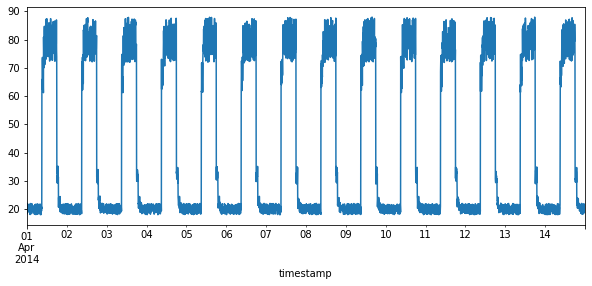

In [15]:
# set the fig size
# fig, ax = plt.subplots(figsize=(12,6))
# used pandas (plt) to plot a pandas dataframe
# plotting onto ax i.e. axes
# can use pyplot figsize to increase fig size as desired
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame. Axis legend autopopulated.
df_small_noise.plot(legend=False, ax=ax);

<br>

#### df_ daily_jumpsup
---

In [16]:
# define df_daily_jumpsup as read in csv
# transpose it to a pandas dataframe with column header 'timestamp'
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [17]:
# printout the first 5 values in df
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [18]:
# describe the dataframe
df_daily_jumpsup.describe()
# (can leave out print function for pd style as below as required)

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [19]:
# describe the dataframe 
print(df_daily_jumpsup.describe())

             value
count  4032.000000
mean     44.494254
std      32.432473
min      18.001010
25%      19.991382
50%      21.648503
75%      76.435943
max     164.947481


In [20]:
print(df_small_noise.describe())

             value
count  4032.000000
mean     42.438353
std      28.077122
min      18.000964
25%      19.841390
50%      21.608487
75%      75.450282
max      87.976128


#### From a quick check of the summary data fo both datasets

In [21]:
# pandas return the 1st value in df
df_daily_jumpsup.iloc[0]['value']

19.761251903

<br>

A simple due-diligence check to compare 1st row of the raw data shown above with that returned from the dataframe.  
On inspection the dataframe has rounded the data during the upload.  
The values are truncated from 19.76125190**2999998** to 19.761251903.  
Conclusion: the values are rounded. This should be noted. We will take note and see if it impact the analysis.

In [22]:
# describe the shape of the df
df_daily_jumpsup.shape

(4032, 1)

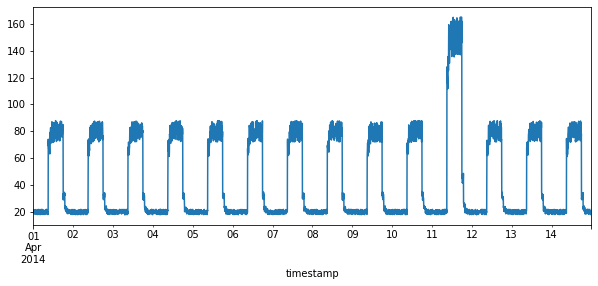

In [23]:
# set the fig size
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

<br>

#### Preprocessing of the data

To prepare the data for passing into keras the 'raw' data needs some preprocessing/

###### First steps

1. Subtract the mean of the dataset from individual values
2. Divide by standard deviation.  
This essentially gets all values normalized between x and y and centered on zero.  
This a common transformation in neural networks.  

***

In [24]:
# get the mean of small noise 
# (one column- if more we would get mean of all columms)
# dataset to be used in neural Network (NN) training 
# we will call it 'train_***'
train_mean = df_small_noise.mean()
train_mean

value    42.438353
dtype: float64

In [25]:
# get the standard deviation of small noise
train_std = df_small_noise.std()
train_std

value    28.077122
dtype: float64

In [26]:
# Subtract the mean from the value
# Divide by standard deviation.
# check to ensure PANDAS doesnt add it to another column
df_train_vals = (df_small_noise - train_mean) / train_std

In [27]:
# to check: return the 1st 5 values in the dataframe
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [28]:
# to check: return the last 5 values in the dataframe
df_train_vals.tail()

,value
timestamp,
2014-04-14 23:35:00,-0.791647
2014-04-14 23:40:00,-0.780255
2014-04-14 23:45:00,-0.833640
2014-04-14 23:50:00,-0.735102
2014-04-14 23:55:00,-0.846089


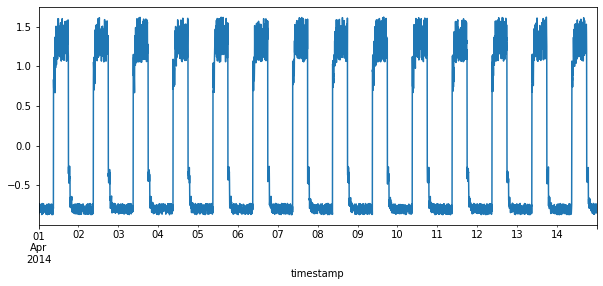

In [29]:
# now lets plot the train_vals dataframe to have a look

fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

The x values (time) unaffected.  The y values are now centered around 0.  
However importantly the overall trend is maintained.  
The df is overwritten.  
To show the transformation in an alternative way, the df can be extended as below.  
The resulting data should be the same.  
As can be seen, a quick check and the df_train_vals 'value' (above) correspond to df_small_noise 'value' (below).

In [30]:
# create a new dataset by subtracting the mean from all values
# designate these 'less_mean'
# The new data will be added to the dataset as additional columns
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [31]:
# print out dataframe
# check the # of rows
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [32]:
# calculate and print out the mean of the above columns
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

##### Explanation:
The mean of the 'less_mean' column is effectively zero as expected as its a mean of normalized data.  
The mean of the 'div_std' column is effectively zero as expected as its a mean of stdev.  
The mean of the 'value' column is 42.43 and is the same as df_small_noise (mean) i.e it is unaffected.  
The new dataset is linearly equivalent to the original but an effective mean of 0 and a standard deviation of 0.  


In [33]:
# Return the standard deviation of the columns above
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

<br>

The standard deviation of 'value' and 'less_mean' are the same.  
The standard deviation is unaffected by the transformation.  
The data transformation uses the mean divide to scale the data only.  
The standard deviation of the div_std is 1.0 as normalized stdev is expected to be +/1.0.  
Standard deviation is centered by the mean

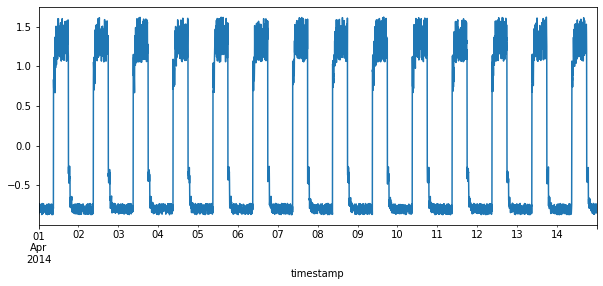

In [34]:
# plot the transformed data
# define size of plot
fig, ax = plt.subplots(figsize=(10,4))


# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

The plot shows the training values with mean/stdev transformation as above are now between +1.5 and -0.8.  
Effectively the transformation has just scaled the graph by transforming the numbers (-mean and /stdev) to create a standardised plot.  
Its easier to discern that the data shows more low values than high values.

In [35]:
# check the dataframe shape
df_train_vals.shape

(4032, 1)

<br>

Confirmation of 4032 rows in df_train vals.  
Therefore no data missing after troandformation.

In [36]:
# lets check the dataframe columns
df_train_vals.columns

Index(['value'], dtype='object')

<br>

Thus column names are values , datatype = object.  
Value is name of the column

### Data Preparation for Keras

In [37]:
# define the value of 'time_steps'
# which the code originally used
# renamed to window_size below
time_steps =288

In [38]:
# Generated training sequences for use in the model
#def create_sequences(values, time_steps=TIME_STEPS):
    #output = []
    #for i in range(len(values)- time_steps +1):
        #output.append(values[i : (i+ time_steps)])
    #return np.stack(output)

#def create_sequences(values, time_steps):
    #output = []
    #for i in range(len(values)- time_steps +1):
        #output.append(values[i : (i+ time_steps)])
    #return np.stack(output)

<br>

#### Assigning a value for 'time steps'

To run the Neural Network we need the pre-processed data to be fed in a specific format  
The format is an array of 'values' of defined length.  
The length of the array to  be used is defined as 'time_steps'.  
A series of arrays or 'windows' will be fed into the neural network as training data.  
The concept of 'windows' or more specifically 'sliding windows'is an important aspect in data analytics and will be explained below.  


<br>

#### Sliding window concept  
We have a linear array of 4032 values.  
Rather than looking at particular values Keras model looks for a change in trend across a series of values.  
The model looks for changes by relative to a specific value in the middle of the 'window'
i.e. how the values in the window left and right of the value are changing.  
This is how the NN model uses training data to train the network.  
The way this is achieved is to split the linear dataset into packets of data defined by a sliding window.  
The window of predesigned size is moved left to right across the dataset  
The data window containing 'training values' is passed into Keras.  
Once the window reaches the end of the dataset the 1st cycle is completed.  
Thus the last data point is included in just one window.  
There is a detailed explanation using dummy array as a worked example below.

<br>

![image](../images/sliding_window.png)


In [39]:
# set 'time_steps'
window_size = 288

<br>

##### Further explanation of sliding windows
###### Dummy Data Window example:
###### We begin with a linear array of 12 values and a window size of 3:
###### Python window function can reshape the array with window_size command:
###### Note its not a split in to 4 arrays but rather 10:
###### Last array will contain last three values [3,4,5]:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [40]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [41]:
# Number of windows from L.
len(L) - (win_size - 1)

10

As shown above the number of windows is calculated by  
the length of the array minus window size +1  
Lets build further the code.

In [42]:
# Remove brackets.
len(L) - win_size + 1

10

In [43]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


<br>

As shown above the final array or 'window' contains the last three values 3,4,5.  
Accumulating the arrays can be executed using relatively simple python code.  
Lets build the arrays required.

In [44]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins
# outpus the linear array above in dataframe of len 3 starting with each element

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

<br>

Keras requires the data to be fed in as individual arrays.  
Therefore we need to convert the single array into individual arrays

In [45]:
# Create a 2D numpy array from wins.
# output as individual arrys
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

<br>

We now need to create a python function to create correct data shape for input to NN (Keras).  
To do this we will need to pass in the values and window size  as parameters into the function.  
We need to slice the the array into windows of date each containing the required number of values.  
Create a function that passes in the values and the window size and outputs a new set of arrays.  

This coule be visualised as 'slicing' the array after each value with a slice size as ' window size' . 
Individual values can be in multiple slices.  
Finally we create a vertical stack of these slices in readiness for passing into keras.

In [46]:
# create a function 
def windows(vals, N=window_size):
  # define an empty array for values
  L = []
  # iterate through vals for all windows of len N 
  for i in range(len(vals) - N + 1):
    # append another row 'slice' of N vals to L[]
    L.append(vals[i:i+N])
  # Stack i.e output L as individual arrays
  return np.stack(L)

As we slice the 1d array of 'vals' left to right using the 'window size cookie cutter' all windows will have a full set of values, with exception of window size-1.  
These will have an incomplete set.

##### Check of code
Check the code returns the right amount of windows.  
Use the sample array to verify the code is working as expected before using on the training data.

In [47]:
# number of windows from L
d= len(L)-(win_size -1)
# remove brackets
w= len(L)-win_size +1
d,w

(10, 10)

In [48]:
# NUMBERS OF WINDOWS FROM l
len(L) -(win_size -1)

10

In [49]:
# NUMBERS OF WINDOWS FROM l (no brackets- same)
len(L) -win_size +1

10

In [50]:
# Have a look at the windows visually
# iterate through i arrays using a for loop and print what loop returns
for i in range(len(L) -win_size +1):
    print(L[i:i + win_size]) 

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


<br>

Collate the individual arrays into a new array

In [51]:
# accumulatigng the windows in a new empty array
wins = []

# Generate the windows
for i in range(len(L) -win_size +1):
    wins.append(L[i:i + win_size]) 
wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

<br>

However it is still a 1d array.  Need to transform to a 2d array.  
Python NUMPY 'stack' does this.

In [52]:
# stack wins
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

<br>

We are now ready to create the actual data for Keras NN

<br>

#### Create the training set  
We use a numpy array.  
Call it x_train and create it from the original dataset.  
Transform the original df (4032,1) to x_train ((3745, 288, 1)) using def windows().  
df_train_vals is the zeroed array.  
x_train is the windows applies to dataset.

In [ ]:
# create x_train
x_train = windows(df_train_vals)

<br>

Lets have a look at the array first value [0] and last value [-1]  
There should be 288 rows.  
Keras requires each individual value  in an individual list.


In [ ]:
# inspect the x_train array
# first and last figures
x_train[0][0], x_train[0][-1]

df_train_vals is the zeroes array, whereas x_train is the windows applied to the dataset.  
Lets take a look at the df_train_vals.  
Lets compare the 1st value in x_train and 1st value in 1st window of df_train_vals.  
As mentioned before checking the provenance of the data is important to ensure data accuracy.

In [ ]:
#get 1st and last values from dataframe using iloc
df_train_vals.iloc[0], df_train_vals.iloc[-1]

<br>

spot check midway in dataset

In [ ]:
#get 2000th value from dataframe using iloc
df_train_vals.iloc[2000]

<br>

Have a look at the data within x-train arrays.  
Check the data foramt.  Does it look reasonable?

In [ ]:
# have a look at the array first value [0] and value [1]
#RETURN 1ST VALUE IN 1ST WINDOW ALONG WITH FIRST VALUE IN THE LAST WINDOW
x_train[0][0], x_train[-1][-1]

<br>

Lets do a quick re-check of the original dataset shape

In [ ]:
# print out the values where 'value'
df_train_vals['value'].values

In [ ]:
# review original shape of df -i.e 4032 values
df_train_vals.shape

<br>

Lets confirm the X-train shape is transposed from the original dataset shape

In [ ]:
# check shape
x_train.shape

<br>

Theoretical: 4032(dataset)-288(window size)+1 =3745.  
We have confirmed x_train consists of 'windows' of size 288.  
3745 of these x_train 'windows' ready to pass in to the model.  
',1' says 3rd dimension of 1.  
<br>

Lets have a look at the 1st 'window' in x_train.

In [ ]:
# return 1st window of 288 values
x_train[0].flatten()

<br>

Check the initial values remain the same as original dataset.  
We can do this by printing the df_train_vals again.  
See below the df_train 1st three values correspond to 1st 3 values in 1st row of x_train above.

In [ ]:
df_train_vals['value'].values

<br>

#### Lets start to plot the dataframes to visualise.

In [ ]:
# plot df_train- take a look at data
fig, ax = plt.subplots(figsize=(12, 6))

# define Y values as df_train_vals values
y =df_train_vals['value'].values
# y =df_train_vals['value'].values[:100] #SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:200] #SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:1200] #1ST 4 PEAKS
# EVENTUALLY WILL SEE THE STEP UP 

ax.plot(np.arange(y.shape[0]), y);

<br>

##### Lets plot 1st 100 df_train_vals values

In [ ]:
# plot df_train- take a look at data
fig, ax = plt.subplots(figsize=(12, 6))

# define Y values as df_train_vals values
#y =df_train_vals['value'].values
y =df_train_vals['value'].values[:100] #SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:200] #SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:1200] #1ST 4 PEAKS
# EVENTUALLY WILL SEE THE STEP UP 

ax.plot(np.arange(y.shape[0]), y);

<br>

##### Lets plot 1st 200 df_train_vals values

In [ ]:
# plot df_train- take a look at data
fig, ax = plt.subplots(figsize=(12, 6))

# define Y values as df_train_vals values
# y =df_train_vals['value'].values
# y =df_train_vals['value'].values[:100] #SEE WHAT HAPPENS
y =df_train_vals['value'].values[:200] #SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:1200] #1ST 4 PEAKS
# EVENTUALLY WILL SEE THE STEP UP 

ax.plot(np.arange(y.shape[0]), y);

<br>

##### Lets plot 1st 1200 df_train_vals values

In [ ]:
# plot df_train- take a look at data
fig, ax = plt.subplots(figsize=(12, 6))

# define Y values as df_train_vals values
# y =df_train_vals['value'].values
# y =df_train_vals['value'].values[:100] #SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:200] #SEE WHAT HAPPENS
y =df_train_vals['value'].values[:1200] #1ST 4 PEAKS
# EVENTUALLY WILL SEE THE STEP UP 

ax.plot(np.arange(y.shape[0]), y);

In [ ]:
# plot df_train- take a look at data
fig, ax = plt.subplots(figsize=(12, 6))

# 
y =df_train_vals['value'].values
# y =df_train_vals['value'].values[:100] -SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:200] -SEE WHAT HAPPENS
# y =df_train_vals['value'].values[:1200] -1ST 4 PEAKS
# EVENTUALLY WILL SEE THE STEP UP 

# QUICK HACK
# PLOT FIRST OF ALL AX.PLOT DF TRAIN VALS
# PULL OUT THE VALUES 
# RECREATE THE PLOT OF DF TRAIN VALS AS ABOVE BUT WITH MORE CONTROLS
# 4032V VALUES IN HERE
# CHANGE TO 1ST 100 -SEEWHAT HAPPENS
ax.plot(np.arange(y.shape[0]), y);

In [ ]:
# DEFINE WINDOW NUMBER
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))


y = df_train_vals['value'].values # ADD [:1200] ETC TO VIEW LESS DATA


# X AXIS NOW IS NUMBER OF DATAPOINT
# THIS JUST CREATES AN ARRAY FRON 0-4032. JUST A TRICK
# CHANGE THE '0' BELOW- SEE WHAT HAPPENS
# IN ORANGE IS THE WINDOW
# CHANGE '0' TO CHANGE WINDOW
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window. 
# X TRAIN 0 (EACH VALUE IN OWN ARRAY)
# FLATTEN REMOVES THIS INNER ARRAY

w = x_train[window_no].flatten()

# CHANGE THE '0' BELOW- SEE 
# CHANGE THE WINDOW NUMBER- SEE WHAT HAPPENS
# 200TH WINDOW ETC
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

# ADD A LEGEND
ax.legend();

## Neural Network

***

##### Training a Model:  
Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples.  
In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called empirical risk minimization.  
<br>Loss is the penalty for a bad prediction.  
That is, loss is a number indicating how bad the model's prediction was on a single example. 
If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater.  
The goal of training a model is to find a set of weights and biases that have low loss, on average, given a set of input values.  
<br>
The **squared loss** for a single example is square of the difference between the label and the prediction:  

  = (observation - prediction(x))2  
  = (y - y')2  
  
##### Mean absolute error (MAE)**  

In the context of machine learning, absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.  
MAE takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group  
MAE can also be referred as L1 loss function, least absolute deviations (LAD), least absolute errors (LAE).  It is basically minimizing the sum of the absolute differences between the real value and the predicted values.  

##### Mean square error (MSE)** 

Mean square error is the average **squared** loss per example over the whole dataset. 
To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples.  
The choice of which to use is related to robustness of the model and likelihood of outliers.  
MAE is more robust than MSE as the former is more resistant to potential outliers in the data.  
This may be helpful in studies where outliers may be safely and effectively ignored
If it is important to pay attention to any and all outliers, the method of least squares is a better choice.



In [ ]:
 # get less windows than values(4032) as effectively run out of '288' 
# numbers remaining in array cannot make-up a 288 window thus not used
# keras needs the third dimension below i.e. '1'

x_train.shape

In [ ]:
# WHAT IS THE NEURAL NETWORK ACTUALLY DOING
# SHAPE 1 IS 288, SHAPE 2 IS 1.
# ONE DIMENSIONAL
# ALL OF THE NODES WITH 288 VALUES ARE COMING IN AS ONE
# GOOGLE CONVOLUTIONAL 1D LAYER
# EXPLAIN WHAT THIS IS
# WE HAVE AN INPUT LATER SO NO NEED FOR 1D
# GOOGLE TOWARDSDATASCIENCE.COM/UNDERSTANDING-1D-AND 3D- CONVOLUTION-NEURAL-NETWORK-KERAS
# GENERALLY WE REFER TO A 2D CNN
# ALSO 1D 3D CNN AND APPLCATIONS IN REAL WORLD
# INTRODUCED IN IMAGE CLASSIFICATION
# KERNEL SLIDES ALONG 2 DIMENSIONS ALONG THE INPUT
# LOT LIKE THE WINDOW WE HAVE ABOVE WHEN 1D
# NOT TOO DIFFICULT TO WORK OUT WHAT THE LAYER DOES
# WAS SUGGESTED  IN TDS.COM MORE COMMON TO HAVE A 2D
# CHECK TENSORFLOW - 2D CONV
# NOT THE MOST HELPFUL BUT IF GO DOWN THROUGH-# DO RESEARCH ON THIS
# LOOK AT LAYERS OF THE NN BUILT IN THIS EVAL NOTEBOOK
# HAS AN INPUT LAYER- DOES WHAT IT SATS ON THE TIN
# CONV 1D LAYER
# DROPOUT LATER
# CONV 1D LAYER
# CONV ID TRANSPOSE LAYER- MATRIX TRNSPOSE?
# ALL HAVE IS INPUT, CONVID, DROPOUT, CONV1D TRANSPOSE
# CONV 1D/CONV 1D TRANSPOSE ARE SIMILAR
# SEE IF YOU CAN FIND INFORMATION THERE

# GOAL OF PROJECT IS - SHOW YOU CAN WORK OUTSIDE COMFORT ZONE
# GIVE YOU THE TOOLS TO LOOK UP - STACKOVERFLOW/TOWARDS DATASCIENCE/DATACAMP
# GET THAT IT WILL BE TRICKY FOR YOU -
# PART OF THE ASSESSMENT
# TRY 1ST - ASK QUESTIONS IF STUCK


#### Description of the Neural Network- whats happening

A Keras *tensor* is a symbolic tensor-like object.  

An input layer only has nodes. It's only job is take in the data and pass it on the hidden layer. 

All of the 288 nodes are coming in as one.  We have an input layer so there is no need for 1D.

A dense layer has the links (edges) connected to it, with weights. It also has an activation function.

The data from each input node gets multiplied with the weights of the links via which those input nodes are connected to the first hidden layer  

Each node of the hidden layer then combines all the inputs to it (one from each input node) and passes through an activation fuction.

A similar process repeats for the second hidden layer.

A dropout layer (see explanation below) is added before the output layer. It drops a certain percentage (20% in our case) of the links randomly, that are connected to the output node.

We simply define each layer and the preceding layer it's connected to, and then package them all together using the function 'Model'

The data will be passed through this network, one row at a time. The network will spit out an answer which will be compared with the value in the first column. This first prediction will be based on weights that mare set randomly. The error in the prediction will be used to change the weights in such a way that the prediction is better.

This will happen for all the 3745 rows. We can adjust the weights after passing through multiple samples (rows) in what we call a "batch". When all the rows have passed in this way, we say one "epoch" is over. We go through many epochs.

How is it decided how many epochs?  This happens when the NN assesses it has captured the patterns in the data and is in a position to make predictions.  This is achieved by holding out a few samples of data as a *validation set*.  
They are not used for training (i.e for updating the weights). The validation set is run after every epoch, by keras and the error checked.  

Keras also keeps a track of the training error but it's not as important as validation error since the training error is what adjusts the weights.  

When the validation error approaches the training error, the NN training is complete.



ConvolutionLayer(filters,kernelsize,opts) creates a convolutional neural network layer with filter filter and kernel size kernelsize.  

Conv1d is used when you slide your convolution kernels along 1 dimensions (i.e. you reuse the same weights, sliding them along 1 dimensions).  

On the other hand tf. layers. conv2d is used when you slide your convolution kernels along 2 dimensions (i.e. you reuse the same weights, sliding them along 2 dimensions).  



##### Lets now input the Layers for Keras

##### Parameters:
- filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution)
- kernel size =7
- shape= defines the expected input dimensional vectors
- padding: "same": output has same dimension as the input
- strides: An integer or tuple/list of a single integer, specifying the stride length of the convolution
- activation: "relu" Rectified Linear Unit activation function.  The "relu" function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back

In [ ]:
# create layers for keras

layers = [
  # Input() is used to instantiate a Keras tensor    
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
    
  # This layer creates a convolution kernel that is convolved with the layer input
    # over a single spatial (or temporal) dimension to produce a tensor of outputs
    # use a transformation going in the opposite direction of a normal convolution
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # ratio of randomly selected neurons are ignored during training
  keras.layers.Dropout(rate=0.2),
    
  # Another convolution kernel taking in the neurons from previous
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  #  Transpose the tensor from shape of the output to the shape of the input
    #the number of output filters in the convolution= 16
    keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # another dropout layer at same ratio (see above)
  keras.layers.Dropout(rate=0.2),
    
  # Transpose once more: the number of output filters in the convolution= 32
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # Transpose one final time: the number of output filters in the convolution= 1
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

#### Dropout in keras

[Dropout][6] is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features, providing some specialization. Neighboring neurons come to rely on this specialization, which, if taken too far, can result in a fragile model too specialized for the training data. This reliance on context for a neuron during training is referred to as complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This, in turn, results in a network capable of better generalization and less likely to overfit the training data.

[6]: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

<br>
The layers of data are passed in to Keras as per above i.e. 'sequentially'  
i.e. the order that the layers are listedf above is the way that the neural Network will be built-up and run.

In [ ]:
# pass in layers var into keras Sequential function
# model is an instance of keras.Sequential
model = keras.Sequential(layers)

<br>


#### Optimizers  

Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses. Optimizers assist the model reaching the desired output faster.  Some examples below:  

- Optimizer class: Base class for Keras optimizers
- SGD: Gradient descent (with momentum) optimizer.e examples below:  
- Adam: Optimizer that implements the Adam algorithm.
- Adagrad: Optimizer that implements the Adagrad algorithm.
- Adamax: Optimizer that implements the Adamax algorithm.
- RMSprop: Optimizer that implements the RMSprop algorithm.

#### Choice of Optimizer  
The most popular are [Stochtasic Gradient Descent (SGD)][4] and [Adam][5] each with individual advantages and disadvantages. The choice of algorithm should be done with a knowledge of the data being analysed as different algorithms fit different data types/structures.

##### SGD:  

Stochastic gradient descent is a very popular and common algorithm used in various Machine Learning algorithms, most importantly forms the basis of Neural Networks. 

If you envisage an expression represented by a parabola or U plot, gradient, in plain terms means slope or slant of a surface.  So gradient descent literally means descending a slope to reach the lowest point on that surface. For a linear function, the objective of regression is to minimize the sum of squared residuals. We know that a function reaches its minimum value when the slope is equal to 0. The same problem can be solved by gradient descent technique.  Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.
 
Find the slope of the objective function with respect to each parameter/feature. In other words, compute the gradient of the function.
- Pick a random initial value for the parameters.  
- Update the gradient function by plugging in the parameter values.
- Calculate the step sizes for each feature as : step size = gradient * learning rate.
- Calculate the new parameters as : new params = old params -step size
- Repeat the above steps until gradient is almost 0.  

The “learning rate” mentioned above is a flexible parameter which heavily influences the convergence of the algorithm. Larger learning rates make the algorithm take huge steps down the slope and it might jump across the minimum point thereby missing it. So, it is always good to stick to low learning rate such as 0.01  It can also be mathematically shown that the gradient descent algorithm takes larger steps down the slope if the starting point is high above and takes smaller steps as it reaches closer to the finishing line to be careful not to miss it and also be quick enough. In order to reduce the computations involved with iterating ‘blind’, SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.


##### Adam:  

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters. 
Its name is derived from *adaptive moment estimation*, and the reason it’s called that is because Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.
Although it offers significantly faster performance, issues have been noticed in certain problems where Adam does not converge to an optimal solution.  researchers continue to work on solutions to bring Adam results to be on par with stochastic gradient descent.  

For the time-series anomaly challenge Adam was chosen as it should not experience issues seen with more complex imaging based challenges, while Adam should be faster than SGD.

[4]: https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31
[5]: https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c#:~:text=Adam%20can%20be%20looked%20at,itself%20like%20SGD%20with%20momentum.


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# compile the output 'model'
# 'mse' is Mean square error is the average **squared** loss per example over the whole dataset.
# See above for more details.
model.compile(optimizer=optimizer, loss="mse")

In [ ]:
# print out a summary
model.summary()

In [ ]:
# model.fit function
# explained here: https://keras.io/api/models/model_training_apis/

# training data fed in with both input and output data
# df_small_noise should be called 'df_no_anomaly'
# training funvtion when run
# original stopped after epoch 15

# this code stops at epoch 12/50
# Why?

history = model.fit(
    x_train,
    x_train,
    epochs=50, # maximum iterations of NN.  It can stop earlier if loss is no longer decreasing siginificantly.
    batch_size=128, # Batch size is how many windows are fed into the neural Network at any time
    validation_split=0.1, # model is asked to hold back 10% for validation
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)
 #INTERESTIGN THING IS XTRAIN IS PASSED INTO MODEL.FIT TWICE -EXPLAIN

<br><br>
In case the validation loss had remained significantly more than the training loss at the end of training, but was continously coming down in the last few epochs, it would have been an indication that we need to run our model for more epochs, as the model needed more training.

If the validation loss had remained significantly more than the training loss at the end of training, and also become more or less static, then it would have been an indication of "overfitting", that is our model works far too well on the training data, it has perfectly captured it, including the noise, but it would work poorly on unseen data. In such a case, it's advised to increase the value in the dropout layer, reduce number of epcohs, increase the batch size, reduce the number of hidden layers, reduce the number of nodes in the hidden layers.

https://www.kaggle.com/code/nitinsss/time-series-prediction-with-keras-for-beginners

Accuracy calculates the percentage of predicted values (yPred) that match with actual values (yTrue)  
For a record, if the predicted value is equal to the actual value, it is considered accurate  
We then calculate Accuracy by dividing the number of accurately predicted records by the total number of records.

#### The Loss Function   

At its core, a loss function is incredibly simple: It's a method of evaluating how well your algorithm models your dataset.  
If your predictions are totally off, your loss function will output a higher number  
If they're pretty good, it'll output a lower number.  
We use a loss function to determine how far the predicted values deviate from the actual values in the training data  
We change the model weights to make the loss minimum.  

#### Training Loss vs Validation Loss  

The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data. 

![image](../images/T&V.png)

##### Epochs:  
The right number of epochs depends on the inherent complexity of the dataset.  
In the above the maximum is set to 50 epochs/iterations. However the process can stop earlier if the loss is no longer changing (reducing) between epochs.  
Otherwise it will run to the maximum. 


## Evaluation

##### evaluating the model
***

In [ ]:
# look at NAB github repository
# READ.me has a list of which model works well with datasets

In [ ]:
# history is the fitted model
# training loss ["loss"] and validation loss {"val_loss"]

# keras. history- there is a history dict that returned from model.fit
# look it up
# output the values
# NN KEEPS A HISTORY AS WEVE SEEN BECAUSE WE INCLUDED 'CALLBACKS' ABOVE
# IT WILL KEEP A HISTRY OF HOW THE FITTING PROCEDURE WENT
# FIGURE OUT WHAT THE 'TRAINING LOSS' AND 'VALIDATION LOSS' MEAN
history.history["loss"]

In [ ]:
# output the values
history.history["val_loss"]

In [ ]:
# history.history loss is just an array of values
# history.val_loss is just an array of values
# SHOULD BE EASY TO WORK OUT WHAT THEY MEAN

In [ ]:
# pandas fig -define the size
fig, ax = plt.subplots(figsize=(10, 6))
# plot values of history.history["loss"]
ax.plot(history.history["loss"], label="Training Loss")
# plot values of history.history["val_loss"]
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [ ]:
# original code from url:
# x_train_pred = model.predict(x_train)
# train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
# plotting code

# clearer to sepearte it out as below

In [ ]:
# Get train MAE loss.
 #ASK IT TO DO A FEW PREDICTIONS

# what doing: get the mode that s trained to predict the vaslues out of the training set
# looking for anomalies
x_train_pred = model.predict(x_train)

In [ ]:
# Calculate loss...
# standard way to see how accurate you are
# take the predicted values- take absolute value. 
# THEN PLOT TRAINING MAE LOSS VS # SAMPLES - FIGURE OUT WHAT THESE MEAN 9DIFFERENCE BETWEEN TRAINIGN LOSS AND VALIDATION LOSS)
# THEN IT SHOULD BECOME CLEAR WHATS BEING PLOTTED BELOW
# Plot
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

In [ ]:
# Pandas fig size
fig, ax = plt.subplots(figsize=(10, 6))
# create a histogram
ax.hist(train_mae_loss, bins=50)
# add x label
ax.set_xlabel("Train MAE loss")
#add y label
ax.set_ylabel("No of samples");

# no requirement for plt(show) in jupyter

In [ ]:
# Get reconstruction loss threshold.
# declare threshold
threshold = np.max(train_mae_loss)

# print out the threshold
threshold

In [ ]:
# BASICALLY THEY PLOT THE TRAINING SET AGAINST WHAT THE NN IS PREDICTING (BASED ON THE TRAINING INPUT) WHAT THE NN PREDICTS WHAT IT SHOULD BE
# NN IS RECEIVING TRAINING SET AS INPUT AND AN OUTPUT
# TRYING TO TRAIN ITSELF FOR THIS INPUT GIVE THE SAME THING AS OUTPUT
# WHEN ANOMALLY THE DIFF IS SIGNIFICANT
# THERE MUST BE AN ANOMALLY FOR THIS DATA
# Pandas fig size
fig, ax = plt.subplots(figsize=(10, 6))

# define x axis
ax.plot(x_train[0])

# define y axis
ax.plot(x_train_pred[0]);

# when training on the window things get smoothed out

In [ ]:
# subtract the training mean and training stdev from the values

# train_mean and train_std as defined above
#  new dataset = df_daily_jumpsup
# apply anything from training set to new dataset hence same operation
# get final dataset we can plot 'df_test_value'
df_test_value = (df_daily_jumpsup - train_mean) / train_std

In [ ]:
# define pandas fig size
fig, ax = plt.subplots(figsize=(10, 6))

#  plot df_test_value values
df_test_value.plot(legend=False, ax=ax);

In [ ]:
# Create sequences from test values.
# same as above rearrange the data frame 
# window size = 288
x_test = windows(df_test_value.values)
# check the x shape as output
x_test.shape

In [ ]:
# feed the dataset into the keras.Sequential model
x_test_pred = model.predict(x_test)

In [ ]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

In [ ]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

In [ ]:
#SEGREGATE THE ANOMALLY

# define pandas fig size (histogram)
fig, ax = plt.subplots(figsize=(10, 6))

# plot the histogram
ax.hist(test_mae_loss, bins=50)

# set x label
ax.set_xlabel("test MAE loss")

# set y label
ax.set_ylabel("No of samples");

In [ ]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Number of anomalies.
np.sum(anomalies)

In [ ]:
#original code from url
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
#anomalous_data_indices =[]
#for data_idx in range(TIME_STEPS-1, len(df_test_value) - TIME_STEPS +1):
    #if np.all(anomalies[data_idx -TIME_STEPS +1 : data_idx]):
        #anomalous_data_indices.append(data_idx)

In [ ]:
# simplified
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [ ]:
inds

In [ ]:
# gest the subset of df_subset where anomaliess
df_subset = df_daily_jumpsup.iloc[inds]

In [ ]:
# WHATS PREDICTED OUT OF THIS WITH THIS ANOMALLY  FOR NN IS V DIFFERENT TO WHATS SEEN
 #NICE LITTLE PLOT THAT COULD BE 
# define pandas plot size
fig, ax = plt.subplots(figsize=(10, 6))

# plot the original dataset in blue
df_daily_jumpsup.plot(legend=False, ax=ax)

# plot anomalies over the original plot in red
df_subset.plot(legend=False, ax=ax, color="r");

In [ ]:
# SHOULD HAVE A GOOD GROUNDING OF THE DATASET UNDER THE HOOD
# HERES WHATS HAPPENING -WINDOW ACROSS
# NN THAT TAKES IN WINDOW/WINDOES AS INPUT
# NN TAKES INPUT/OUTPUT AT SAME TIME
# WHEN ANOMALLY IT WILL FIND  THAT SIGNAL GOES TOO HIGH
# ABLE TO DETECT AN ANONMALLY IN THE SIGNAL

# TRICKY ENOUGH ASSESSMENT
# PULL THIS APART A BIT 
# SEE WHAT THE 

# EXPLAIN THIS SOMEHOW
# KNOW WHAT A DF IS 
#LOOK AT THE DATA - 2 DATA SETS
# SEE WHATS HAPPENING TO THOSE NUMBERS - DESPITE ADAM/VALIDATION LOSS
# ASK Q IN FORUM 
# SEND SAMPLE WHAT YOU TRIED -PRESENT A SNIPPET OF WORK

# AT VERY LEAST EVEN PUT EXPLANATIONS ON WHAT THE DATASET IS, WHER IT CAME FROM, WINDOWS, TECHHIE STUFF

# JUST HAVE TO DO WHAT YOU CAN DO

# PLENTY OF MARKS FROM THE EXERCISES


#### References:  

1. Tensorflow https://www.tensorflow.org/about
2. Numenta Anomaly Benchmark (Kaggle) https://www.kaggle.com/datasets/boltzmannbrain/nab
3. Numenta Anomaly Benchmark <https://github.com/numenta/NAB>
4. Time Series Anomaly Detection <https://keras.io/examples/timeseries/timeseries_anomaly_detection/>
5. Evaluating Real-time Anomaly Detection Algorithms - the Numenta Anomaly Benchmark https://doi.org/10.48550/arXiv.1510.03336
6. Anomaly detection https://www.anodot.com/blog/what-is-anomaly-detection  
7. Detecting anomalies using autoencoder  https://www.kaggle.com/code/ohseokkim/dectecting-anomaly-using-autoencoder
8. Keras <https://keras.io/>
9. Training and Loss <https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss>  
10. ML Training <https://developers.google.com/machine-learning>
11. Cross-entropy & loss functions <https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy>
12. Loss-function in Tensorflow <https://medium.datadriveninvestor.com/loss-function-in-tensorflow-b7eb1215ef78>
13. Stochtastic Gradient Descent <https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31>
14. Adam Optimizer <https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c#:~:text=Adam%20can%20be%20looked%20at,itself%20like%20SGD%20with%20momentum>
15. Time Series Prediction with Keras https://www.kaggle.com/code/nitinsss/time-series-prediction-with-keras-for-beginners
16. Rectified Linear Units in deep learning https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning/notebook
17. Time Series Windows for Tensorflow https://www.mlq.ai/time-series-tensorflow-windows-horizons/

#### Additional References

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53  
Synopsis:
Artificial Intelligence has been witnessing monumental growth in bridging the gap between the capabilities of humans and machines. Researchers and enthusiasts alike, work on numerous aspects of the field to make amazing things happen. One of many such areas is the domain of Computer Vision.

The element involved in the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K.  
The Kernel shifts 9 times because of Stride Length = 1 (Non-Strided), every time performing an elementwise multiplication operation (Hadamard Product) between K and the portion P of the image over which the kernel is hovering.  The filter moves to the right with a certain Stride Value till it parses the complete width.  

The flattened output is fed to a feed-forward neural network and backpropagation is applied to every iteration of training

Over a series of epochs, the model is able to distinguish between dominant and low-level signal and classify them using the Softmax Classification technique.

https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

Synopsis:  
Convolutional layers are the major building blocks used in convolutional neural networks.  

The convolutional neural network, or CNN for short, is a specialized type of neural network model designed for working with two-dimensional image data, although they can be used with one-dimensional and three-dimensional data.  
Central to the convolutional neural network is the convolutional layer that gives the network its name. This layer performs an operation called a *convolution*.
A convolution is a linear operation that involves the multiplication of a set of weights with the input, much like a traditional neural network. The multiplication is performed between an array of input data and a two-dimensional array of weights, called a filter or a kernel.  
The Keras deep learning library provides a suite of convolutional layers.  
Example of 1D Convolutional Layer  

We can define a one-dimensional input that has eight elements all with the value of 0.0, with a two element bump in the middle with the values 1.0. e.g. [0, 0, 0, 1, 1, 0, 0, 0] .

The first dimension refers to each input sample; in this case, we only have one sample  
The second dimension refers to the length of each sample; in this case, the length is eight  
The third dimension refers to the number of channels in each sample; in this case, we only have a single channel.  
Therefore, the shape of the input array will be [1, 8, 1].


https://machinelearningmastery.com/crash-course-convolutional-neural-networks/  

https://keras.io/api/layers/convolution_layers/  

https://ikhlestov.github.io/pages/machine-learning/convolutions-types/


Synopsis:  

### Different types of Convolution Layers

- Simple Convolution.
- 1x1 Convolutions.
- Flattened Convolutions.
- Spatial and Cross-Channel convolutions.
- Depthwise Separable Convolutions.
- Grouped Convolutions.
- Shuffled Grouped Convolutions.


https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215


### Understanding ID and 3D Convolution  
Synopsis:

https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610

### Understanding ID and 3D Convolution  
Synopsis:

When we say Convolution Neural Network (CNN), generally we refer to a 2 dimensional CNN 'Conv2D' which is used for image classification. But there are two other types of Convolution Neural Networks used in the real world, which are 1 dimensional and 3-dimensional CNNs.    

Conv2D is generally used on Image data. It is called 2 dimensional CNN because the kernel slides along 2 dimensions on the data.  
The whole advantage of using CNN is that it can extract the spatial features from the data using its kernel, which other networks are unable to do. For example, CNN can detect edges, distribution of colours etc in the image which makes these networks very robust in image classification and other similar data which contain spatial properties.  

On the other hand In Conv1D, kernel slides along one dimension.  Time-Series data has spatial properties thus is perfectly suited to use kernel sliding in only one dimension.  The kernel can only move in one dimension along the x axis which in the case of out data is time. 

In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data.

'''
import keras
from keras.layers import Conv1D
model = keras.models.Sequential()
model.add(Conv1D(1, kernel_size=5, input_shape = (120, 3)))  

Argument input_shape (120, 3), represents 120 time-steps with 3 data points in each time step.  Argument kernel_size is 5, representing the width of the kernel. 
Argument kernel_size is 5, representing the width of the kernel.



model.summary()'''


***

## End